# 株式データ分析

こんにちは．[しんせいたろう](https://twitter.com/shinseitaro)です．米株などを取引する個人トレーダーです．データ分析を元に取引しています．

Fintech関連の勉強会に参加したり，主催したりしていますが，同業界でなかなか女性にお会いすることがなく，今回は PyladiesTokyo Advent カレンダーに投稿して女性の方にこちらの世界に興味を持って頂ければ，と思い参加しました．宜しくお願いします．

第一章では， pandas を使ってデータの表示，プロット方法や，ちょっとした分析を行い，時系列データとは何か？を説明していきたいとおもいます．そのあと、統計学の基礎的な話をします。

### 想定読者

+ python 中級者
+ ある程度 pandas が使える人
+ [PythonユーザのためのJupyter[実践]入門](https://www.amazon.co.jp/dp/4774192236)はだいたいついて行けるという人
+ 世の中には株というものが存在する，というくらいは知っている人

---

### 事前準備

#### install 

+ pandas 
+ numpy 
+ matplotlib 
+ jupyter notebook 

#### データ

+ [ダウンロードセンター](https://indexes.nikkei.co.jp/nkave/index?type=download)から，`日経平均株価＞日次データ` 
---


<h3 style="border-bottom: 1px solid #000;padding: 7px;">Read CSV</h3>


In [5]:
%matplotlib inline

# file を DataFrame に読み込む
import pandas as pd 
import matplotlib as plt 
import matplotlib.dates as mdates

plt.style.use('ggplot') #おしゃれスタイル


# filepath 
f = "/tmp/nikkei_stock_average_daily_jp.csv"
# encoding指定, セパレータ指定， index として使う行の指定を追加して csv を DataFrame にする
df = pd.read_csv(f, encoding="shift-jis",  sep=',', index_col="データ日付")

# 最終行5行を表示
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/10/29,21149.80,21323.61,21465.99,21109.97
2018/10/30,21457.29,21049.52,21568.40,21035.88
2018/10/31,21920.46,21569.56,21920.46,21530.39
2018/11/01,21687.65,21906.41,21906.41,21628.45
本資料は日経の著作物であり、本資料の全部又は一部を、いかなる形式によっても日経に無断で複写、複製、転載または流布することができません。,NaN,NaN,NaN,NaN


In [6]:
# 最終行は不必要なので除去
df = df.iloc[:-1] 

In [7]:
df.tail()

,終値,始値,高値,安値
データ日付,,,,
2018/10/26,21184.60,21440.84,21476.66,20971.93
2018/10/29,21149.80,21323.61,21465.99,21109.97
2018/10/30,21457.29,21049.52,21568.40,21035.88
2018/10/31,21920.46,21569.56,21920.46,21530.39
2018/11/01,21687.65,21906.41,21906.41,21628.45


In [8]:
# index の型を確認．dtype='object'
df.index

Index(['2015/01/05', '2015/01/06', '2015/01/07', '2015/01/08', '2015/01/09',
       '2015/01/13', '2015/01/14', '2015/01/15', '2015/01/16', '2015/01/19',
       ...
       '2018/10/19', '2018/10/22', '2018/10/23', '2018/10/24', '2018/10/25',
       '2018/10/26', '2018/10/29', '2018/10/30', '2018/10/31', '2018/11/01'],
      dtype='object', name='データ日付', length=942)

In [9]:
# 日時データを扱う datetime 型に上書きする
df.index = pd.to_datetime(df.index)
df.index

DatetimeIndex(['2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-13', '2015-01-14', '2015-01-15',
               '2015-01-16', '2015-01-19',
               ...
               '2018-10-19', '2018-10-22', '2018-10-23', '2018-10-24',
               '2018-10-25', '2018-10-26', '2018-10-29', '2018-10-30',
               '2018-10-31', '2018-11-01'],
              dtype='datetime64[ns]', name='データ日付', length=942, freq=None)

<h3 style="border-bottom: 1px solid #000;padding: 7px;">描画</h3>


（**メモ**： 描画の際，日本語が表示されない場合は，こちらを参照して下さい→ [3分でmatplotlibを日本語対応させる - Qiita - ](https://qiita.com/knknkn1162/items/be87cba14e38e2c0f656)）




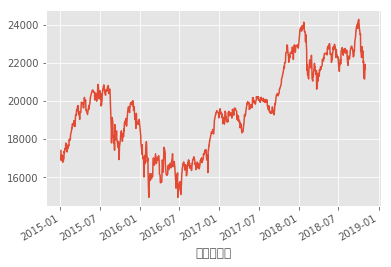

In [10]:
plt.rcParams['font.family'] = 'IPAPGothic'

# 終値だけ折れ線グラフで表示
df["終値"].plot()

少し味気ないので，フォーマットやグリッドの変更を加えてみます．

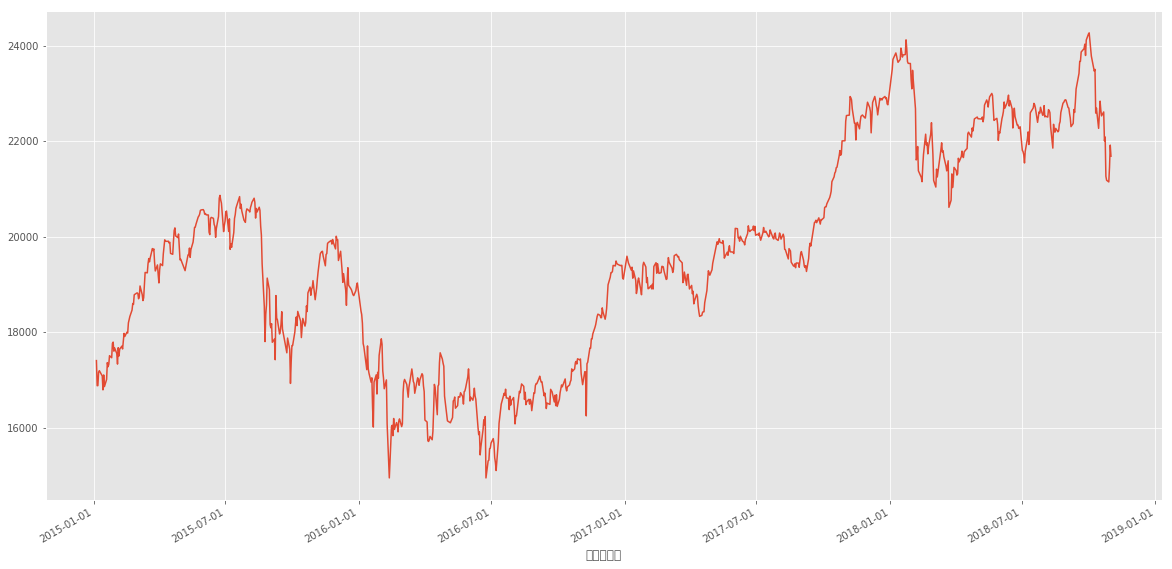

In [11]:
# x軸の日付フォーマットを変更
# プロットのサイズを大きく変更
# グリッドを表示
# (ここはsubplotで書き直すべきかなー？)
ax = df["終値"].plot(figsize=(20,10), grid=True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


#### 毎日の収益を確認する

毎日の収益率。= `今日の終値/前日の終値-1` 

[pct_change](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pct_change.html)で計算



In [20]:
df["終値"].pct_change().tail()

データ日付
2018-10-26   -0.003956
2018-10-29   -0.001643
2018-10-30    0.014539
2018-10-31    0.021586
2018-11-01   -0.010621
Name: 終値, dtype: float64

横軸に日付、縦軸に収益率で、点でプロット


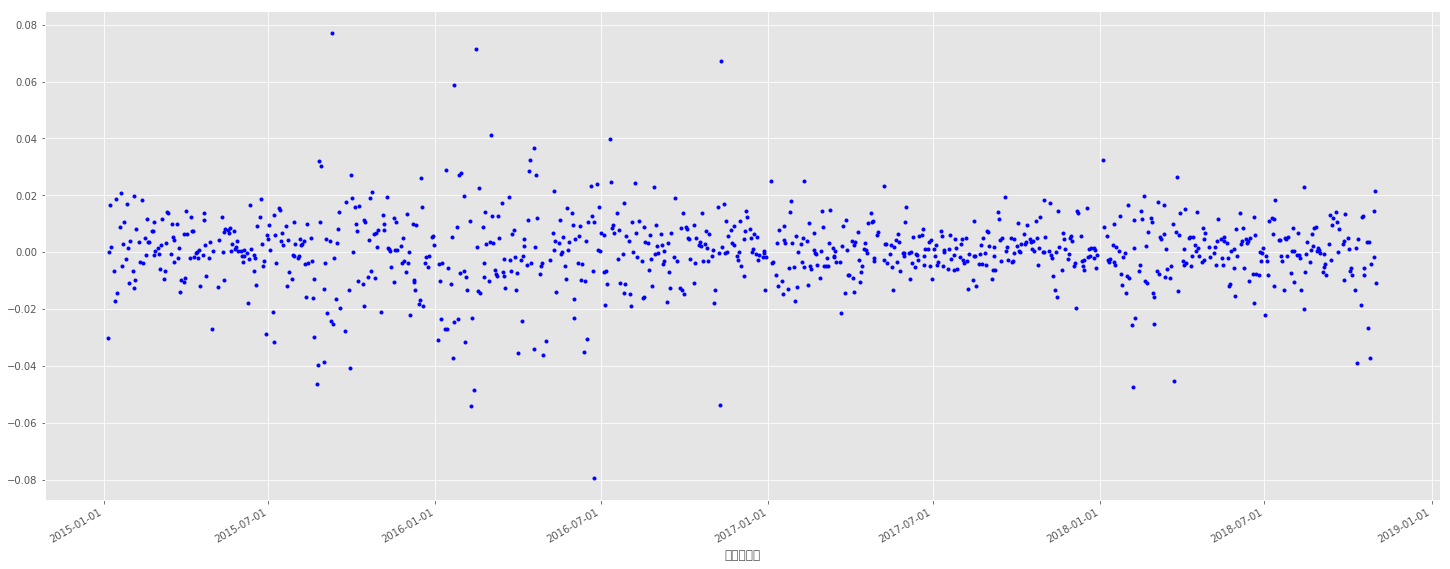

In [13]:
ax = df["終値"].pct_change().plot.line(style=['b.'], figsize=(25,10), grid=True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


観察印象

+ 2015年8月頃〜2016年前半くらいまで点が上下に大きくバラバラ動いて見える
+ 2017年8月前後は，点が0.00近くに寄っているように見える
+ 大体の点は-0.02〜0.02の間に入っているように見える
+ 時期によってばらつきが大きく異なる




（あとでまとめる）

<h3 style="border-left: 15px solid #c3d825;padding: 7px;background: #e3e5d0;">すこしだけ統計学の話</h3>

ここに超多面体（ｎ面体）のサイコロがあるとします。各面は、100から100+nの整数が書いてあり、重複していてもOK。このサイコロを降る関数はこのように書けます。


In [30]:
def dice(n):
    return np.random.randint(100, 100+n, size=n)
dice(10)


[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

10回降ると、↑の様に目が出ます。
この時、サイコロを投げて出る目は　`[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]` のいずれかでその確率は1/10です。

このように確立が存在する

#### 確率変数
#### 密度関数
#### 確率関数
#### 確率分布
#### 正規分布、標準正規分布


日経平均株価の日時収益率は、-0.02〜0.02　に集中しているように見えましたね。これを [ヒストグラム（度数分布図）](https://ja.wikipedia.org/wiki/%E3%83%92%E3%82%B9%E3%83%88%E3%82%B0%E3%83%A9%E3%83%A0)で表現します。

ヒストグラムとは、データ連続したグループに分け、そのグループにいくつ入っているか数え、棒グラフで表現したものです。

例えば、1年1組の全員を身長順に並んでもらい、100cm~110cm, 111cm~120cm, 121cm~130cm、・・・という具合にグループ分けして(1cm以下は切り捨て）、各グループに何人いるかを数えてグラフにすると行った作業になります。

では、日経平均株価の日時収益率を10のグループに分けてみましょう。これは、[Series.value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html?highlight=value_counts)を使うと簡単にできます。


In [15]:
df['終値'].pct_change().value_counts(bins=10, sort=False)


(-0.0804, -0.0636]       1
(-0.0636, -0.048]        3
(-0.048, -0.0323]       13
(-0.0323, -0.0167]      46
(-0.0167, -0.00106]    327
(-0.00106, 0.0146]     477
(0.0146, 0.0302]        63
(0.0302, 0.0458]         7
(0.0458, 0.0615]         1
(0.0615, 0.0771]         3
Name: 終値, dtype: int64

これによると、`-0.00106 〜 0.0146` に最もたくさんの収益率が集まっていますね。
これを、棒グラフで表してみます。[hist](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) を使うとすぐ描画できます。


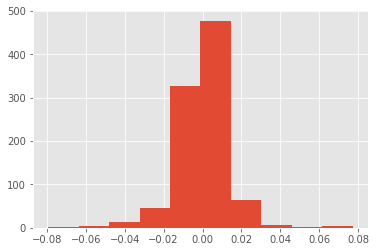

In [16]:
df['終値'].pct_change().hist(bins=10)

真ん中にだいぶ寄っていますね。今度はグループを50に分けて見てみましょう

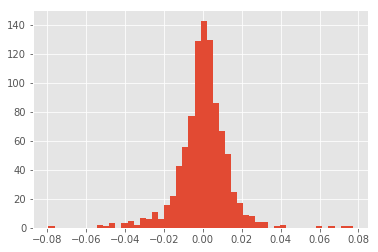

In [17]:
df['終値'].pct_change().hist(bins=50)

だいぶ真ん中に寄っている事がわかりますし、観察したとおり-0.02〜0.02の間にほとんど溜まっていることがわかります。

では次にランダムに作ったデータのヒストグラムを作って見ましょう。

